## Homework 1

For your first homework you need to find a time series. Just plot it and submit it. I will give you feedback *if* your series contains anomalies that cannot be handled with the methods learned in class. You will analyze the series in your future homeworks. 

Please modify the Jupyter notebook below. Code and Markdown cells that need to be adjusted are in <span style="color:green">green</span>. Replace the example series with your chosen series. Save the file as 'HW1_[your last name here].ipynb' (e.g. 'HW1_sivec.ipynb'). Submit also the data file (xls or csv). Name the data file 'data_[your last name here].file_extension' (e.g. 'data_sivec.xls'). 

Submission should contain the following two files: (1) Modified 'HW1.ipynb' and (2) 'data_[your last name here].file_extension'. 

**Submitt to vasja.sivec@uni.lu by 13.Oct.2024**
***
***
*List of suggested sources*: 

    Statec - National Institute of statistics and economic studies of the Grand Duchy of Luxembourg

https://statistiques.public.lu/en.html

    Eurostat - Statistical office of the EU - features numerous series on economy, finance, population, industry, environment,...

https://ec.europa.eu/eurostat/web/main/data/database  

    ECB SDW - European Central Bank data - data on interest rates, loans, exchange rates, financial corporations,... for european countries

https://sdw.ecb.europa.eu/

    World Bank data - Global development data (rGDP, population, social conditions,...) for almost all the countries in the world.  

https://data.worldbank.org/

    IMF data - International Monetary Fund data features data on economic and financial conditions for most countries of the world

https://www.imf.org/en/Data

    FRED data - Federal Reserve Bank of St. Louis - go-to source for any data on socio-economic conditions in the US

https://fred.stlouisfed.org/ 

    Pen world data - University of Groningen development statistics

https://www.rug.nl/ggdc/productivity/pwt/?lang=en

    Climate change data

https://www.climate.gov

Feel free to explore other sources! This could be the statistical office of your own country or a time series related to your hobby. It is advisable to select a series that features a sufficient number of observations, say at least 40. 



# Source and description

<span style="color:green">Full link or name of the provider: </span> https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means?tab=overview \
<span style="color:green">Series code: </span> `t2m`, `ssrd`, `e`, `sp`, `tp`. Here we will only use `tp`.\
<span style="color:green">Date of access: </span>  Oct.10.2024. \
<span style="color:green">Description: </span> ERA5-Land monthly averaged data from 1974 to 2022, variables `t2m`, `ssrd`, `e`, `sp`, `tp`. Not seasonally adjusted. The data for this analysis was originally downloaded for the entire planet. Afterwards, we selected only the region around Esch-sur-Alzette in southern Luxembourg. Specifically, we used latitude **49.5°** and longitude **6.0°** values, which correspond to latitude index **405** and longitude index **60** in the downloaded `.nc` file from https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means?tab=overview. We then extracted `t2m`, `ssrd`, `e`, `sp`, `tp` variables from the data and saved it as `.csv` file.


# Characteristics

<span style="color:green"> Periodicity or frequency: </span> Montly; Yearly.  \
<span style="color:green"> Time span: </span> Jan. 1974 - Dec. 2022. \
<span style="color:green"> Number of observations: </span> Monthly: 588; Yearly: 49.

# Figure

Plot the series and corresponding correlation and autocorrelation functions. Please plot also the first differences of the series. <span style="color:green">Modify the code below</span> so that it imports and plots your series.

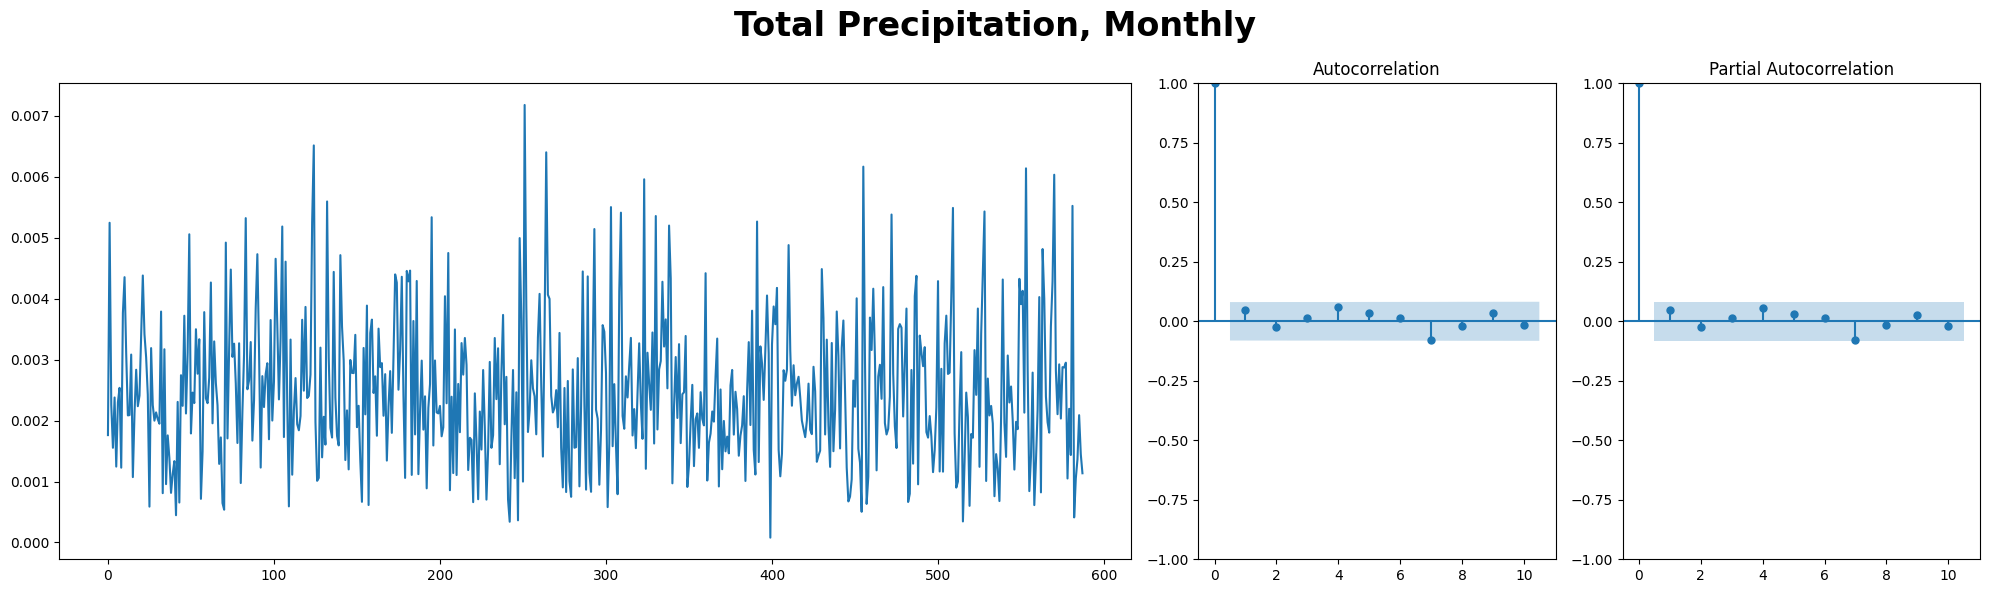

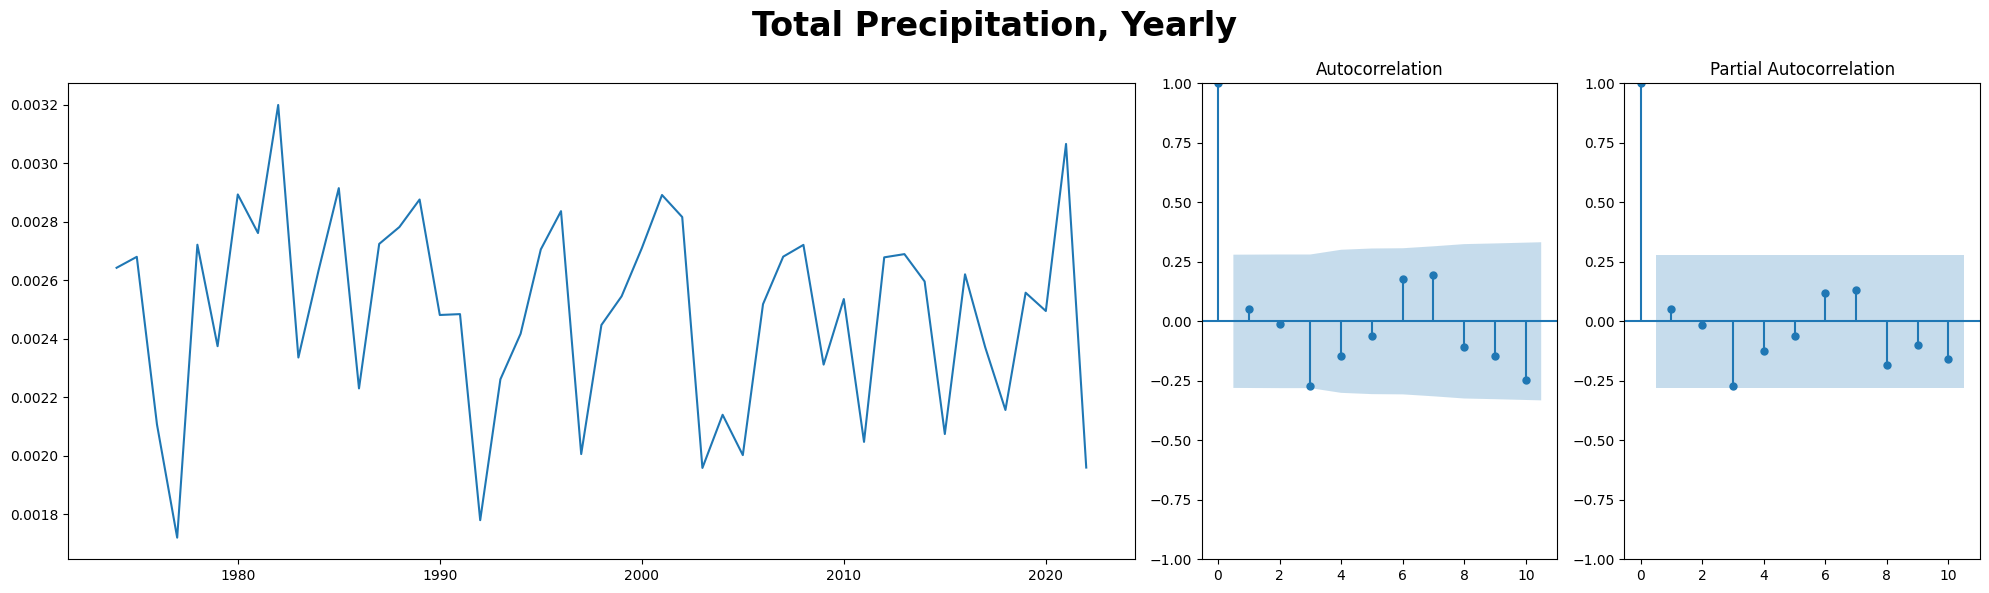

In [20]:
# PART 1: Plot levels of the series and AC& PAC
# import packages
# pip  install xlrd    
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# load data
# os.chdir('C:\\git\\uni_lux\\3\\Reproducible Pipelines and Timeseries\\1') # set working directory to your file's location
df = pd.read_csv("data/data.csv")
df_grouped = df.groupby("year").mean().reset_index()
variable = "tp"
# plots 
fig, axs = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw={"width_ratios": [0.6, 0.2, 0.2]})
axs[0].plot(df[variable])
sm.graphics.tsa.plot_acf(df[variable], lags=10, ax=axs[1])
sm.graphics.tsa.plot_pacf(df[variable], lags=10, ax=axs[2])
fig.suptitle("Total Precipitation, Monthly", fontsize=24, fontweight="bold")
plt.tight_layout()

fig, axs = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw={"width_ratios": [0.6, 0.2, 0.2]})
axs[0].plot(df_grouped["year"], df_grouped[variable])
sm.graphics.tsa.plot_acf(df_grouped[variable], lags=10, ax=axs[1])
sm.graphics.tsa.plot_pacf(df_grouped[variable], lags=10, ax=axs[2])
fig.suptitle("Total Precipitation, Yearly", fontsize=24, fontweight="bold")
plt.tight_layout()

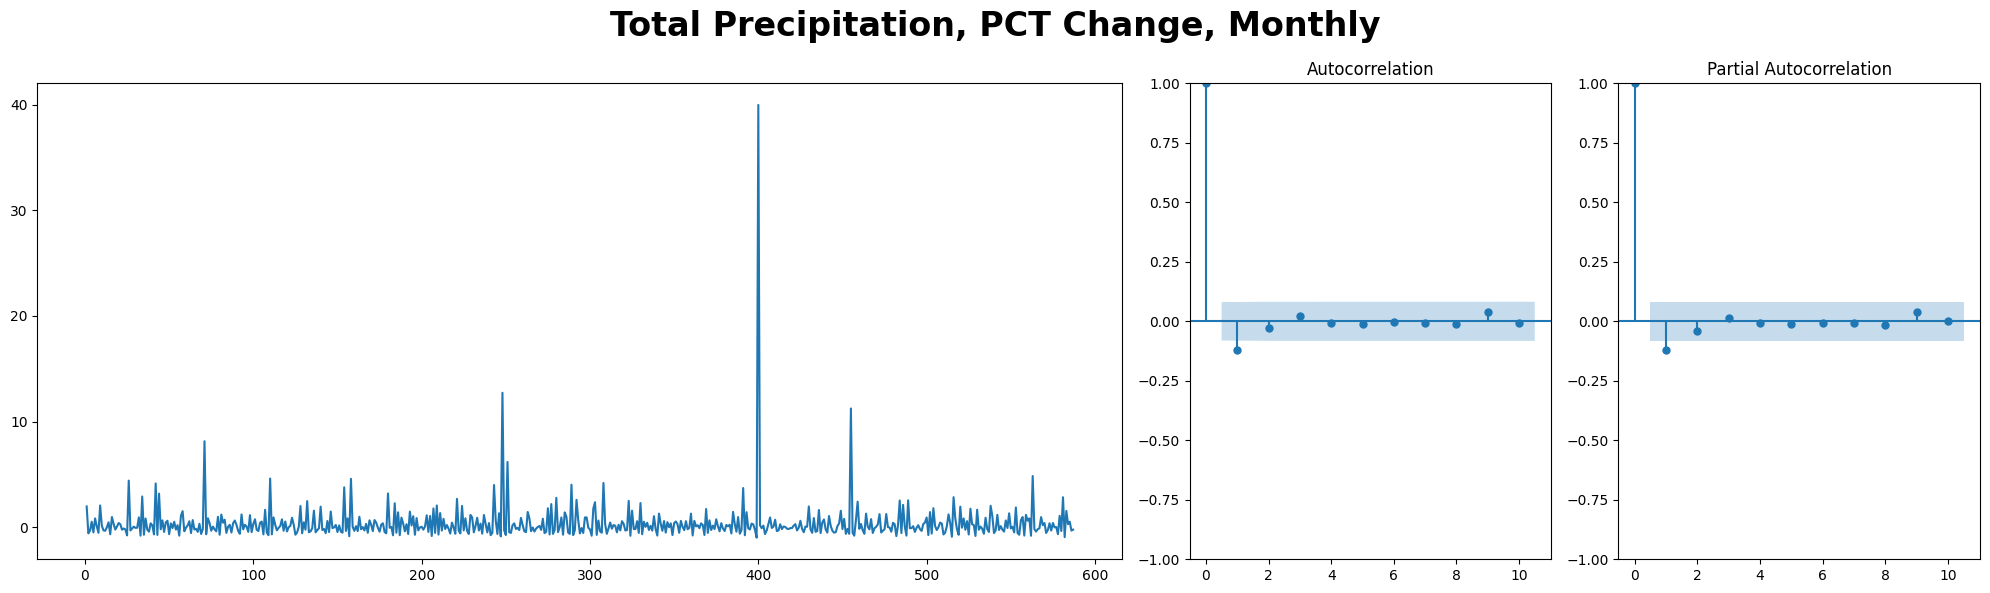

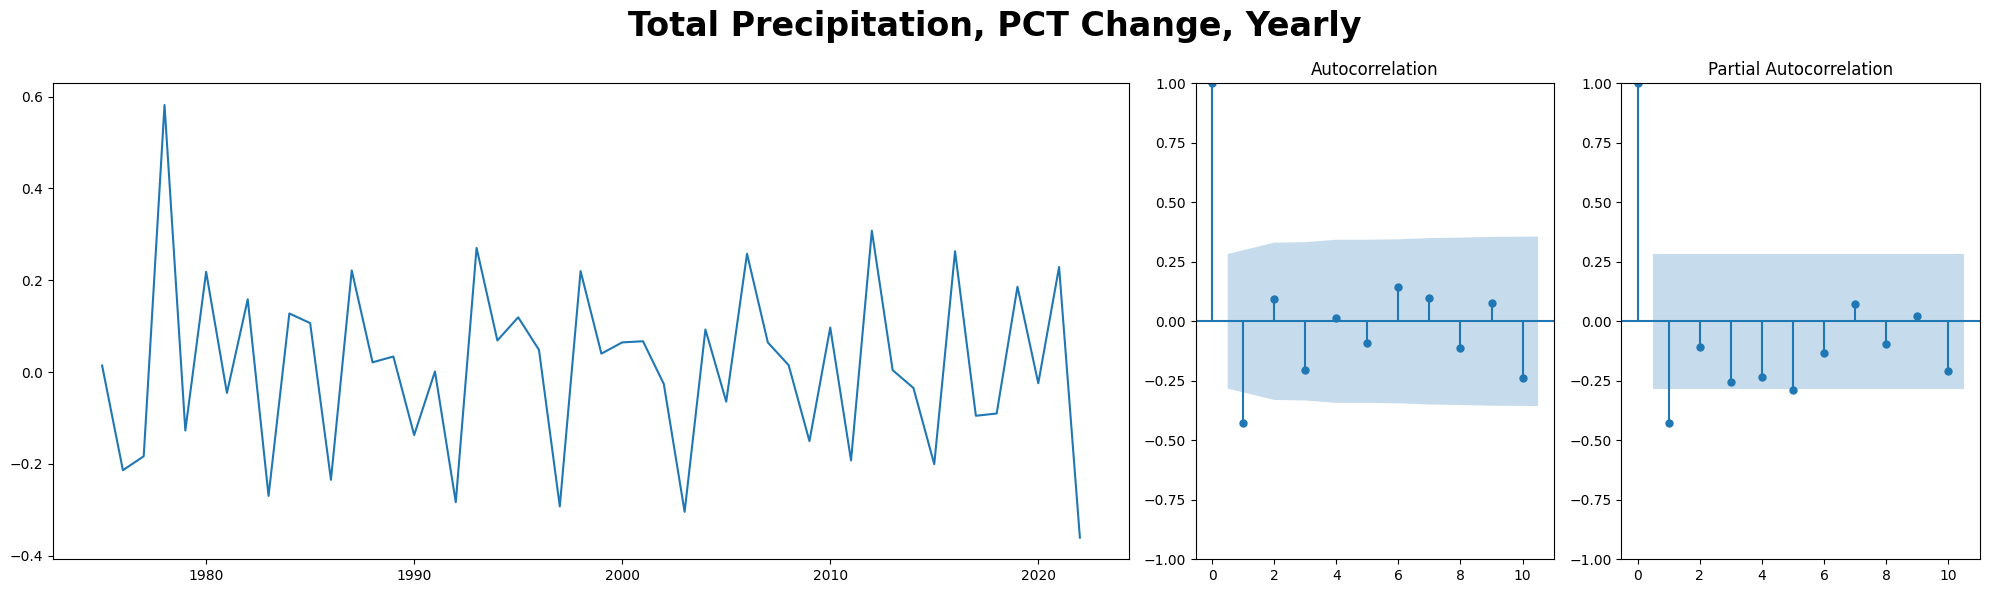

In [21]:
# PART 1: Plot first differences of the series and AC& PAC
d_variable = "d" + variable
df[d_variable] = df[variable].pct_change()
df_grouped[d_variable] = df_grouped[variable].pct_change()
# plots 
fig, axs = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw={"width_ratios": [0.6, 0.2, 0.2]})
axs[0].plot(df[d_variable][1:])
sm.graphics.tsa.plot_acf(df[d_variable][1:], lags=10, ax=axs[1])
sm.graphics.tsa.plot_pacf(df[d_variable][1:], lags=10, ax=axs[2])
fig.suptitle("Total Precipitation, PCT Change, Monthly", fontsize=24, fontweight="bold")
plt.tight_layout()

fig, axs = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw={"width_ratios": [0.6, 0.2, 0.2]})
axs[0].plot(df_grouped["year"][1:], df_grouped[d_variable][1:])
sm.graphics.tsa.plot_acf(df_grouped[d_variable][1:], lags=10, ax=axs[1])
sm.graphics.tsa.plot_pacf(df_grouped[d_variable][1:], lags=10, ax=axs[2])
fig.suptitle("Total Precipitation, PCT Change, Yearly", fontsize=24, fontweight="bold")
plt.tight_layout()